
ML using SEMMA MODEL
Data------>>>>>>SEMMA---------->>>>>Knowledge
stage 1:Data Collection

# Step1:Data Collection

In [1]:
import pandas as pd  #for data handling
import numpy as np   #for mathematical eq
import matplotlib.pyplot as plt #for plotting
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlibinline` not found.


In [2]:
#read the sample from http
#data=pd.read_csv("http://hackveda.in/sistec/Housing_Modified.csv")
data=pd.read_csv(r'C:\Users\nishath afreen\Desktop\internship\hackveda\Housing_Modified.csv')
data.head(10)

FileNotFoundError: [Errno 2] File C:\Users\nishath afreen\Desktop\internship\hackveda\Housing_Modified.csv does not exist: 'C:\\Users\\nishath afreen\\Desktop\\internship\\hackveda\\Housing_Modified.csv'

In [3]:
#check shapeof dataset
#data.shape or
print("Dataset has %d rows and %d columns" %data.shape)

Dataset has 546 rows and 12 columns


In [4]:
data.isnull().sum() #checks if any column has null values

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [5]:
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [6]:
#extract multiple columns out of the data
data[['price','lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase']]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase
0,42000.0,5850,3,1,two,yes,no,yes
1,38500.0,4000,2,1,one,yes,no,no
2,49500.0,3060,3,1,one,yes,no,no
3,60500.0,6650,3,1,two,yes,yes,no
4,61000.0,6360,2,1,one,yes,no,no
...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no
542,94000.0,6000,3,2,four,yes,no,no
543,103000.0,6000,3,2,four,yes,yes,no
544,105000.0,6000,3,2,two,yes,yes,no


In [7]:
print("max price of house",data['price'].max())
print("min price of house",data['price'].min())
print("mean price of house",data['price'].mean())      #this is for only one column
print("sum of price of house",data['price'].sum())

max price of house 190000.0
min price of house 25000.0
mean price of house 68121.59706959708
sum of price of house 37194392.0


In [8]:
#check unique values from the data
print("unique values of bedroms",data['bedrooms'].unique())
print("unique values of airco",data['airco'].unique())

unique values of bedroms [3 2 4 1 5 6]
unique values of airco ['no' 'yes']


# plotting

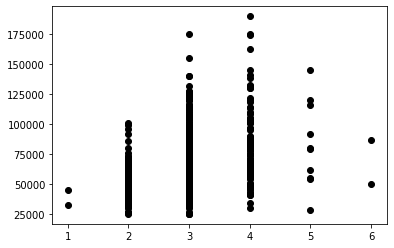

In [9]:
plt.scatter(data['bedrooms'],data['price'],color='black')

Text(0, 0.5, 'price')

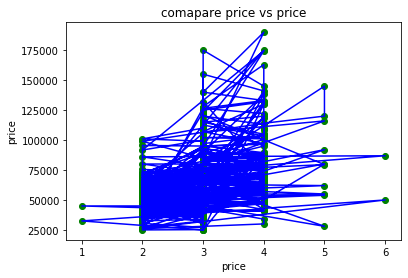

In [10]:
#create a line plot and scatter plot with price vs lotsize
plt.scatter(data['bedrooms'],data['price'],color="green")
plt.plot(data['bedrooms'],data['price'],color='blue')
plt.title("comapare price vs price")
plt.xlabel("price")
plt.ylabel("price")

# Explore the data and quantity influencing variable 
#Calculate correlation,to check +ve or -ve influencers

In [11]:
data.corr()  #data gets prepossed such that non-integer value gets removed

,price,lotsize,bedrooms,bathrms,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.178178
garagepl,0.383302,0.352872,0.139117,0.178178,1.000000


# Step-2:We are processing the data here

In [12]:
# convert text to number using label binarizer by sklearn preprocessing
import sklearn.preprocessing as pp
lb=pp.LabelBinarizer()  #converts into 0,1
#lb1=pp.LabelEncoder()   #converst
data.driveway=lb.fit_transform(data.driveway)  #here the values has been chenged for only driveway col
data.recroom=lb.fit_transform(data.recroom)
data.airco=lb.fit_transform(data.airco)
data.prefarea=lb.fit_transform(data.prefarea)
data.gashw=lb.fit_transform(data.gashw)
data.fullbase=lb.fit_transform(data.fullbase)
data.head(10)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0
5,66000.0,4160,3,1,one,1,1,1,0,1,0,0
6,66000.0,3880,3,2,two,1,0,1,0,0,2,0
7,69000.0,4160,3,1,three,1,0,0,0,0,0,0
8,83800.0,4800,3,1,one,1,1,1,0,0,0,0
9,88500.0,5500,3,2,four,1,1,0,0,1,1,0


In [13]:
data.stories[data.stories=='one']=1
data.stories[data.stories=='two']=2
data.stories[data.stories=='three']=3
data.stories[data.stories=='four']=4
data.stories[data.stories=='five']=5
data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,1,0,0,1,0,0
542,94000.0,6000,3,2,4,1,0,0,0,1,0,0
543,103000.0,6000,3,2,4,1,1,0,0,1,1,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


In the above process we have prepossed the data for better analysis ,becoz previously it
displayed only the  numerical values columns and after prepossing we got the following data
such that now we got all columns in the numerical form such that data mining can be easier for the
modelling of the machine

In [14]:
data.to_csv("Housing_Project.csv")

In [15]:
#here in the above it is important to perform analysis by prepossing the data
#such that string are converted into numbers ,this leads to easier in analysis

In [16]:
data1=pd.read_csv(r"C:\Users\nishath afreen\Desktop\internship\hackveda\Housing_Project.csv")
data1.drop(['Unnamed: 0'],axis=1,inplace=True)
data1

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,1,0,0,1,0,0
542,94000.0,6000,3,2,4,1,0,0,0,1,0,0
543,103000.0,6000,3,2,4,1,1,0,0,1,1,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


# Data Correlation

In [17]:
data1.corr()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.122499,0.042281,-0.173860,0.018261,0.296216,0.043412,0.042940
driveway,0.297167,0.288778,-0.011996,0.041955,0.122499,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
recroom,0.254960,0.140327,0.080492,0.126892,0.042281,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
fullbase,0.186218,0.047487,0.097201,0.102791,-0.173860,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gashw,0.092837,-0.009201,0.046028,0.067365,0.018261,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170
airco,0.453347,0.221765,0.160412,0.184955,0.296216,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626


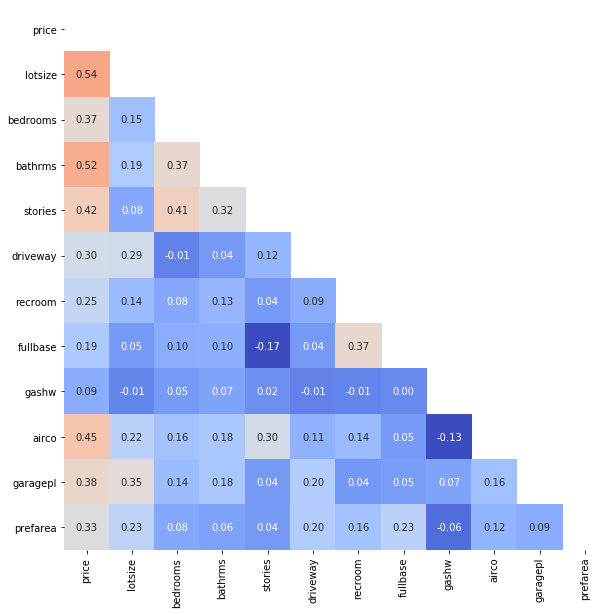

In [18]:
import seaborn as sns
corr=data1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
#cmap = sns.diverging_palette(150, 10, as_cmap=True)
sns.heatmap(corr,mask=mask,cmap='coolwarm',annot=True,fmt=".2f",annot_kws={'size':10},
            cbar=False,vmax=0.8,robust=True,square=10)

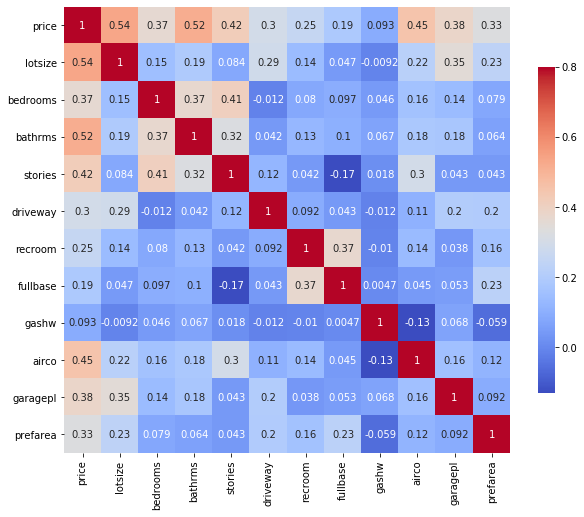

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="coolwarm",annot=True,annot_kws={'size':10},cbar=True,vmax=0.8,robust=True,square=9,cbar_kws={"shrink": 0.6})

# step:3 Data Transformation

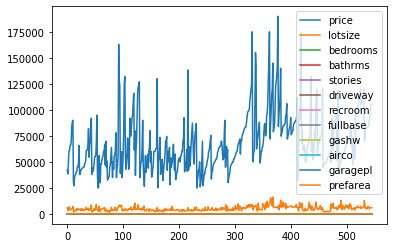

In [20]:
data1.plot()  #graph of the entire processed data

In [21]:
#Data Transformation using Normalization
#Implementing Standardization technique
#Formula:(X-Xmean)/Xstd
#X=INdependant variable
#Xmean=mean of X variable
#Xstd=Std deviation of X independent variable
print("columns in the data1",data1.columns)
print("Max value of lotsize before transformation",data1['lotsize'].max())
print("Min value of lotsize before transformation",data1['lotsize'].min())
print("Mean value of lotsize before transformation",data1['lotsize'].mean())
#convert these values within the range of 0-1 i.e we need to perform Min-Max Scaling
#We are going to transfrom using "std score"/"Standardization"
Xdt=data1['lotsize'] #select indep var
Xdtmean=Xdt.mean()  #mean of indep var#
Xdtstd=Xdt.std()    #std of indepvar
Xdttrans=(Xdt-Xdtmean)/Xdtstd  # X normalised value after Tranfromation 
print("X normalised value after Tranfromation is:\n",Xdttrans)
print("X normalised min val Tranfromation is:\n",Xdttrans.min())
print("X normalised  max val Tranfromation is:\n",Xdttrans.max())

columns in the data1 Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')
Max value of lotsize before transformation 16200
Min value of lotsize before transformation 1650
Mean value of lotsize before transformation 5150.2655677655675
X normalised value after Tranfromation is:
 0      0.322732
1     -0.530526
2     -0.964074
3      0.691709
4      0.557955
         ...   
541   -0.161550
542    0.391915
543    0.391915
544    0.391915
545    0.391915
Name: lotsize, Length: 546, dtype: float64
X normalised min val Tranfromation is:
 -1.6143954439482222
X normalised  max val Tranfromation is:
 5.096367855203785


# Standardization of all the columns

In [22]:
indep_var=data1.columns
indep_var=indep_var.delete(0)   #either use "delete"/drop
print("indep_var:",indep_var)

indep_var: Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')


In [23]:
X=data1[indep_var] #indep_var
Y=data1['price']  #dependent var
#perform stdardization on indep_var
from sklearn.preprocessing import StandardScaler  
#Standard Scalar:It Standardize feature by removing the mean and scaling to unit variance
#z=(x-u)/s
scale=StandardScaler()  #converting to 0-1 range of indep_var for better analysis
Xs=scale.fit_transform(X) #fit_transform=fit into the data and then transforms
print("Normalized data using std:\n",Xs) #Xnorm is indep_var standarized traing data

Normalized data using std:
 [[ 0.32302806  0.0472349  -0.5694948  ... -0.68103375  0.35756661
  -0.55337157]
 [-0.53101296 -1.31014696 -0.5694948  ... -0.68103375 -0.80452487
  -0.55337157]
 [-0.96495812  0.0472349  -0.5694948  ... -0.68103375 -0.80452487
  -0.55337157]
 ...
 [ 0.39227462  0.0472349   1.42373699 ...  1.46835601  0.35756661
  -0.55337157]
 [ 0.39227462  0.0472349   1.42373699 ...  1.46835601  0.35756661
  -0.55337157]
 [ 0.39227462  0.0472349  -0.5694948  ...  1.46835601  0.35756661
  -0.55337157]]


# Min-Max Scaling Feature for normalizing the data to a range of (a-b)
For Only single variable

In [24]:
Xt= data['lotsize'].head(10)
Xtmin=Xt.min()
Xtmax=Xt.max()
Xtnorm=(Xt-Xtmin)/(Xtmax-Xtmin)
print("the normalized value after feature scaling:\n",Xtnorm)
print("min value after scaling:\n",Xtnorm.min())
print("min value after scaling:\n",Xtnorm.max())

the normalized value after feature scaling:
 0    0.777159
1    0.261838
2    0.000000
3    1.000000
4    0.919220
5    0.306407
6    0.228412
7    0.306407
8    0.484680
9    0.679666
Name: lotsize, dtype: float64
min value after scaling:
 0.0
min value after scaling:
 1.0


# now letus do for all the indep_var defined as X

In [25]:
#feature scal
Xmin=X.min()
Xmax=X.max()
Xmean=X.mean()
Xnorm=(X-Xmin)/(Xmax-Xmin)
print("Feature Scale indep_var after transfromation:\n")
Xnorm
#now all the variables are on commmon scale

Feature Scale indep_var after transfromation:



,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.288660,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.333333,0.0
1,0.161512,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.096907,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.343643,0.4,0.000000,0.333333,1.0,1.0,0.0,0.0,0.0,0.000000,0.0
4,0.323711,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
541,0.216495,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.000000,0.0
542,0.298969,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0
543,0.298969,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
544,0.298969,0.4,0.333333,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0


# plotting

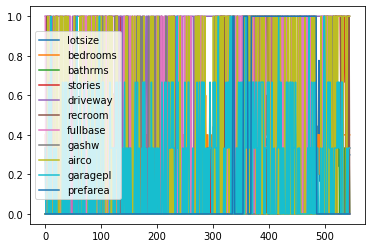

In [26]:
Xnorm.plot()#all the columns are printing on the common scale

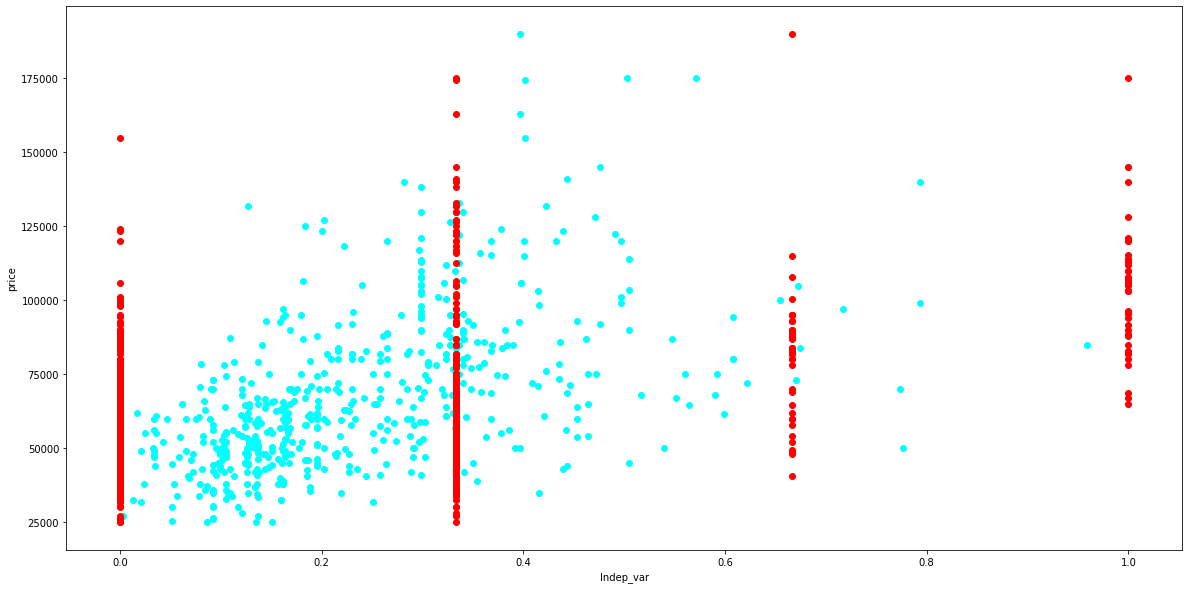

In [27]:
#Compare indep_variable and their influence on price
plt.figure(figsize=(20,10))
plt.scatter(Xnorm['lotsize'],Y,label="price vs indep_var",color="cyan")
plt.scatter(Xnorm['stories'],Y,label="price vs indep_var",color="red")
plt.xlabel("Indep_var")
plt.ylabel("price")
plt.show()

# perform Feature scaling using min-max Scaler
here we can either use formula aproach or direct by library

In [62]:
from sklearn.preprocessing import MinMaxScaler
scale1=MinMaxScaler()
Xminmax=scale1.fit_transform(X)
Xminmax

array([[0.28865979, 0.        , 0.33333333, ..., 0.        , 0.33333333,
        0.        ],
       [0.16151203, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09690722, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29896907, 0.33333333, 1.        , ..., 1.        , 0.33333333,
        0.        ],
       [0.29896907, 0.33333333, 0.33333333, ..., 1.        , 0.33333333,
        0.        ],
       [0.29896907, 0.        , 0.33333333, ..., 1.        , 0.33333333,
        0.        ]])

VIF=the ratio of variance in a model with multiple terms,divided by the variance of a model with one term alone
variance=srqt(std)
R-squared=total sum of the squareResidual(SSR)/sum of square total(SST)


In [63]:
#Calculate R-squared
X#as described as inep_var


,lotsize,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,1,2,1,0,1,0,0,1,0
1,4000,1,1,1,0,0,0,0,0,0
2,3060,1,1,1,0,0,0,0,0,0
3,6650,1,2,1,1,0,0,0,0,0
4,6360,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
541,4800,2,4,1,1,0,0,1,0,0
542,6000,2,4,1,0,0,0,1,0,0
543,6000,2,4,1,1,0,0,1,1,0
544,6000,2,2,1,1,0,0,1,1,0


In [64]:
Y #as described above dep_var

0       42000.0
1       38500.0
2       49500.0
3       60500.0
4       61000.0
         ...   
541     91500.0
542     94000.0
543    103000.0
544    105000.0
545    105000.0
Name: price, Length: 546, dtype: float64

In [65]:
#Train the model using Linear Regression Equation
from sklearn.linear_model import LinearRegression #sklearn=for scientific equation
lr=LinearRegression()
lm=lr.fit(X,Y) 
lm#fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


#Either we can use OLS or Linear Regression for training our model

In [66]:
#Train the model Using OLS
from statsmodels.api import OLS #(Ordinary Least Squares)
ols=OLS(Y,X).fit() #OLS(endog=dep_var,exog=indep_var)

In [67]:
ypred=lr.predict(X)
ypred  #predicting the value

array([ 66181.7141216 ,  42198.71937605,  38818.59823271,  63296.99350105,
        50684.98096997,  65666.8990435 ,  78377.3217151 ,  57031.65718702,
        55362.33640489, 105304.73716788, 100148.06625732,  32343.22810904,
        41057.00921648,  31911.72328223,  40760.36995335,  51874.00414223,
        44906.11083686,  60771.36568603,  40220.98891984,  65455.15611971,
        79398.44067727,  71932.07877613,  61933.44011192,  41961.39172131,
        45650.75799053,  45731.64484025,  41479.5446647 ,  64103.18771022,
        44949.14982396,  63731.37689029,  39987.67289218,  68846.14661326,
        42198.71937605,  43996.65615442,  57813.77999091,  65313.22114906,
        48160.29533464,  80398.21021519,  90602.4632315 ,  53653.27400774,
        54257.07864479,  69649.80236619,  55984.19911317, 104355.57628745,
        42135.77128351,  42298.00134708,  32487.06305131,  39795.65575009,
        53648.73832214,  46990.20058511,  68926.31088119,  42145.19702622,
        87938.0751696 ,  

# Form-1
#calculate R2 score for lR model using Sum of squared total(SST) and Sum of Squared Residual(SSR)

In [68]:

#Calculate Sum Of Squared total(Sum of(y-ymean)^2)
Ymean=Y.mean()
print("mean of actual dep_var",Ymean)
#calculating y-ymean using numpy(for mathematical eq)
sq_total=np.square(Y-Ymean)
print(">>Squared Total is:\n",sq_total)
SST=np.sum(sq_total)
print("---->>>>>>>Sum of Squared Total is:\n",SST)

mean of actual dep_var 68121.59706959708
>>Squared Total is:
 0      6.823378e+08
1      8.774390e+08
2      3.467639e+08
3      5.808874e+07
4      5.071714e+07
           ...     
541    5.465497e+08
542    6.696917e+08
543    1.216503e+09
544    1.360017e+09
545    1.360017e+09
Name: price, Length: 546, dtype: float64
---->>>>>>>Sum of Squared Total is:
 388602785841.3553


In [69]:
#Sum of Squared Residual-(sum(ypred-ymean)^)
sq_residual=np.square(ypred-Ymean)
print("sq_residual",sq_residual)
SSR=sq_residual.sum()
print("Sum of the squared residual\n",SSR)

sq_residual [3.76314585e+06 6.71995588e+08 8.58665741e+08 2.32767996e+07
 3.04035581e+08 6.02554240e+06 1.05179888e+08 1.22986767e+08
 1.62798733e+08 1.38258591e+09 1.02569473e+09 1.28009169e+09
 7.32491916e+08 1.31115496e+09 7.48636749e+08 2.63984276e+08
 5.38958801e+08 5.40259014e+07 7.78443935e+08 7.10990734e+06
 1.27167202e+08 1.45197708e+07 3.82932865e+07 6.84356344e+08
 5.04938609e+08 5.01309961e+08 7.09798956e+08 1.61476138e+07
 5.36962311e+08 1.92740332e+07 7.91517690e+08 5.24972041e+05
 6.71995588e+08 5.82012774e+08 1.06251093e+08 7.88697531e+06
 3.98453567e+08 1.50715230e+08 5.05389343e+08 2.09332372e+08
 1.92224871e+08 2.33541143e+06 1.47316429e+08 1.31290125e+09
 6.75263142e+08 6.66858096e+08 1.26982001e+09 8.02358952e+08
 2.09463640e+08 4.46535917e+08 6.47564319e+05 6.74773359e+08
 3.92692804e+08 2.02592596e+07 6.24819787e+07 7.44706421e+08
 1.43913198e+09 5.79687968e+08 3.01221338e+08 6.02578596e+08
 3.37184118e+08 5.39445800e+08 1.29561706e+07 2.51078677e+08
 9.69294918e

# calculating the R2 -score/R-squared=gives the magnitude of googdness of fit of the model

In [70]:
R_sq=SSR/ SST
print("R_sq:",R_sq)

R_sq: 0.6712494837150642


#  Formula-2:Root Mean Squared Error(RMSE)


In [71]:
square=np.square(Y-ypred)
sig=square.sum()
print("squares:\n",square)
print("sum of squares:\n",sig)

squares:
 0      5.847553e+08
1      1.368053e+07
2      1.140923e+08
3      7.823173e+06
4      1.063996e+08
           ...     
541    4.805684e+07
542    1.854975e+07
543    1.683193e+07
544    1.477422e+08
545    9.934783e+08
Name: price, Length: 546, dtype: float64
sum of squares:
 127753366475.1116


In [72]:
#mean squared errors
mse=sig/len(Y)
print("mean_squared errors:",mse)
rmse=np.sqrt(mse)
print("rmse value:",rmse)

mean_squared errors: 233980524.67969158
rmse value: 15296.421956774453





#  Fromula-3:Calculate Mean absolute error

In [73]:
abs_error=abs(Y-ypred)
sae=abs_error.sum()
mae=sae/len(Y)
print("abs_error:",abs_error)
print("sum of absolut error:",sae)
print("mean absolute error:",mae)

abs_error: 0      24181.714122
1       3698.719376
2      10681.401767
3       2796.993501
4      10315.019030
           ...     
541     6932.304038
542     4306.942128
543     4102.673946
544    12154.924096
545    31519.491135
Name: price, Length: 546, dtype: float64
sum of absolut error: 6127882.692323441
mean absolute error: 11223.228374218756


# Linear Regression model accurancy model metrics by package instead of above 3 formulas

In [74]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
R2_score=r2_score(Y,ypred)
MSE=np.sqrt(mean_squared_error(Y,ypred))
MAE=mean_absolute_error(Y,ypred)
print("R-squared mean",R2_score)
print("Root mean squared error:",MSE)
print("Mean Absolute error:",MAE)

R-squared mean 0.6712494837150598
Root mean squared error: 15296.421956774453
Mean Absolute error: 11223.228374218756


# Remove Multicollinearity using Variation Inflation Factor
Multicollinearity is an incident where 1 or more of the indep_var are strongly correlated with each other  

*VIF is the indicator of the existence of multicollinearity

*VIF=1   --->>no correlation exists

*1<VIF<5 --->>> means moderate correlation

*VIF=1/(1-R-squared)

*ViF is measure for the increase of the variance of the parameter estimates if an additional variable ,given by exog_idx is added to the linear regression .It is the measure for multicollinearity of the design matrix ,exog

In [75]:
#Fit the ordinary Least Squared Regresssion Model
ols
#check the model summary of ols or any other models
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1172.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:00:40   Log-Likelihood:                         -6035.7
No. Observations:                 546   AIC:                                  1.209e+04
Df Residuals:                     536   BIC:                                  1.213e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        3.5725      0.325     11.001      0.000       2.935       4.210
bathrms     1.482e+04   1331.794     11.127      0.000    1.22e+04    1.74e+04
stories     7079.3352    822.349      8.609      0.000    5463.914    8694.756
driveway    6097.9741   1826.098      3.339      0.001    2510.788    9685.160
recroom     4474.0007   1892.393      2.364      0.018     756.584    8191.417
fullbase    5788.5832   1540.712      3.757      0.000    2762.009    8815.157
gashw       1.294e+04   3220.058      4.020      0.000    6619.038    1.93e+04
airco       1.264e+04   1545.505      8.178      0.000    9603.420    1.57e+04
garagepl    4372.5314    833.623      5.245      0.000    2734.962    6010.101
prefarea    9463.4765   1661.216      5.697      0.000    6200.185    1.27e+04
==============================================================================
Omnibus:                       99.771   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.686
Skew:                           0.896   Prob(JB):                     3.71e-60
Kurtosis:                       5.969   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
#calculate variance inflation factor for freeing the multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
for i in range(len(indep_var)):
    vif_list=[vif(data1[indep_var].values,index) for index in range(len(indep_var))]
    maxvif=max(vif_list)
    print("max vif value is",maxvif)
    drop_index=vif_list.index(maxvif)
    print("for the indep_var",indep_var[drop_index])
    if maxvif>10:
        print("Deleting",indep_var[drop_index])
        indep_var=indep_var.delete(drop_index) 
print("Final indep_var",indep_var)

max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
max vif value is 7.738793387948324
for the indep_var bathrms
Final indep_var Index(['lotsize', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase',
       'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')


In [77]:
Y=data1['price']
X=data1[indep_var]
model=OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1172.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):                        0.00
Time:                        17:00:42   Log-Likelihood:                         -6035.7
No. Observations:                 546   AIC:                                  1.209e+04
Df Residuals:                     536   BIC:                                  1.213e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize        3.5725      0.325     11.001      0.000       2.935       4.210
bathrms     1.482e+04   1331.794     11.127      0.000    1.22e+04    1.74e+04
stories     7079.3352    822.349      8.609      0.000    5463.914    8694.756
driveway    6097.9741   1826.098      3.339      0.001    2510.788    9685.160
recroom     4474.0007   1892.393      2.364      0.018     756.584    8191.417
fullbase    5788.5832   1540.712      3.757      0.000    2762.009    8815.157
gashw       1.294e+04   3220.058      4.020      0.000    6619.038    1.93e+04
airco       1.264e+04   1545.505      8.178      0.000    9603.420    1.57e+04
garagepl    4372.5314    833.623      5.245      0.000    2734.962    6010.101
prefarea    9463.4765   1661.216      5.697      0.000    6200.185    1.27e+04
==============================================================================
Omnibus:                       99.771   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.686
Skew:                           0.896   Prob(JB):                     3.71e-60
Kurtosis:                       5.969   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

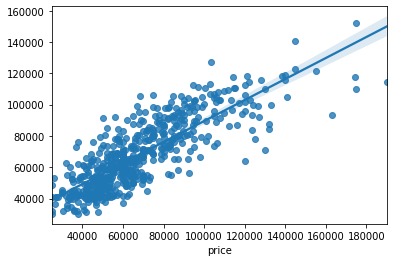

In [82]:
import seaborn as sns
sns.regplot(x=Y, y=ypred)
plt.show()

In [80]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
user_input={}
for var in indep_var:
    temp1=input("Enter "+var+":  ")
    user_input[var]=temp1
user_df=pd.DataFrame(data=user_input,index=[0],columns=indep_var)
price=lm.predict(user_df)
print("The predicted house price is:",int(price[0]))

Enter lotsize:  2000
Enter bathrms:  2
Enter stories:  2
Enter driveway:  1
Enter recroom:  1
Enter fullbase:  1
Enter gashw:  0
Enter airco:  1
Enter garagepl:  0
Enter prefarea:  1
The predicted house price is: 89384
